In [1]:
%matplotlib inline
from pyvista import set_plot_theme
set_plot_theme('document')


# Tunnel


Import des librairies nécessaires

In [2]:
# Importing GemPy
import gempy as gp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('precision', 2)

Not subsurface compatibility available


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Création du modèle

In [3]:
%%time
#wall time 374 ms
data_path = 'https://raw.githubusercontent.com/Mehdi-EM/Tunnel/main'
path_dem = data_path + "/Tunnel_MNT.tif"
path_interf = data_path + "/Tunnel_complet_i.csv"
path_orient = data_path + "/Tunnel_complet_o.csv"
geo_data = gp.create_data('geo_data', [1841000., 1843000., 5176350., 5176600., 150., 270.], [100, 100, 250],            
                          path_i = path_interf,
                          path_o = path_orient,
             default_values=True)

Active grids: ['regular']
CPU times: total: 781 ms
Wall time: 2.4 s


In [4]:
geo_data.surfaces

,surface,series,order_surfaces,color,id
0,remblais,Default series,1,#015482,1
1,argsilmi,Default series,2,#9f0052,2
2,morarcog,Default series,3,#ffbe00,3
3,argjauli,Default series,4,#728f02,4
4,argmipli,Default series,5,#443988,5
5,sabmolmi,Default series,6,#ff3f20,6
6,argcolmi,Default series,7,#5DA629,7
7,basement,Basement,1,#4878d0,8


%%time
#geo_data.get_data().head()
geo_data.get_data().reset_index()
geo_data.get_data().head()

Classement des lithologies

In [5]:
%%time
gp.map_stack_to_surfaces(geo_data, {'Remblais': ('remblais'),
                                    'Moraine': ('morarcog'),
                                    'Argile mio-pliocene': ('argmipli'),
                                    'Argile jaune limoneuse': ('argjauli'),
                                    'Argile silteuse miocene': ('argsilmi'),
                                    'Sables molassiques miocene': ('sabmolmi'),
                                    'Formation du jardin des plantes': ('argcolmi')
                                     }
                        )

CPU times: total: 422 ms
Wall time: 424 ms


,surface,series,order_surfaces,color,id
0,remblais,Remblais,1,#015482,1
2,morarcog,Moraine,1,#ffbe00,2
4,argmipli,Argile mio-pliocene,1,#443988,3
3,argjauli,Argile jaune limoneuse,1,#728f02,4
1,argsilmi,Argile silteuse miocene,1,#9f0052,5
5,sabmolmi,Sables molassiques miocene,1,#ff3f20,6
6,argcolmi,Formation du jardin des plantes,1,#5DA629,7
7,basement,Basement,1,#4878d0,8


Ajout des couleurs

%%time
#mettre les vrai couleurs pour la version finale
colordict = {'remblais': '#a3d779',
             'morarcog': '#92003c',
             'argmipli': '#31ae13',
             'argjauli': '#386709',
             'argsilmi': '#82fd07',
             'sabmolmi': '#804dde',
             'argcolmi': '#29fc5b',
            }
geo_data.surfaces.colors.change_colors(colordict)

Calcul du modèle

In [6]:
%%time
#temps 2-4 min
interp_data = gp.set_interpolator(geo_data,output=['geology'], compile_theano=True,
                    theano_optimizer='fast_run', dtype='float64',
                    verbose=[])

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                                    values
range                             2019.13
$C_o$                            97069.05
drift equations  [3, 3, 3, 3, 3, 3, 3, 3]
CPU times: total: 13.4 s
Wall time: 3min


Affichage des données

CPU times: total: 141 ms
Wall time: 141 ms


C:\Users\cpothier\.conda\envs\gempy38\lib\site-packages\pandas\plotting\_matplotlib\core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
c:\users\cpothier\downloads\gempy-main\gempy-main\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


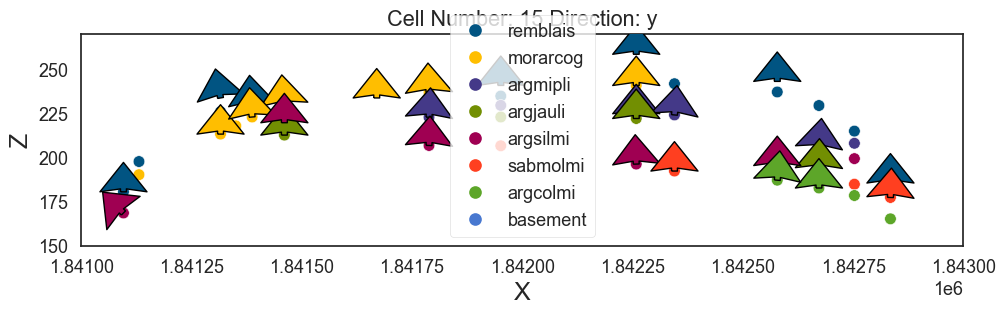

In [7]:
%%time
gp.plot_2d(geo_data, cell_number=15,ve=4,
           direction='y', show_data=True, show_legend=False)

Création d'une coupe

Active grids: ['regular' 'sections']


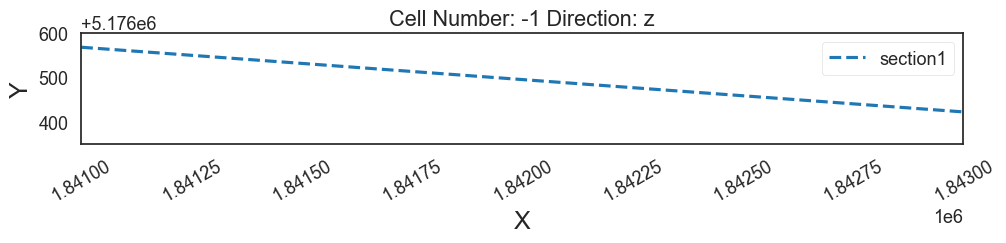

CPU times: total: 750 ms
Wall time: 766 ms


In [8]:
%%time
section_dict = {'section1': ([1841000, 5176568.77], [1843000, 5176422.09], [150, 270])}
geo_data.set_section_grid(section_dict)
gp.plot.plot_section_traces(geo_data)
plt.show()

Ajout de la topographie

In [9]:
%%time
geo_data.set_topography(source='gdal', filepath=path_dem)

Cropped raster to geo_model.grid.extent.
depending on the size of the raster, this can take a while...
storing converted file...
Active grids: ['regular' 'topography' 'sections']
CPU times: total: 1.73 s
Wall time: 3.4 s


Grid Object. Values: 
array([[1.84101000e+06, 5.17635125e+06, 1.50240000e+02],
       [1.84101000e+06, 5.17635125e+06, 1.50720000e+02],
       [1.84101000e+06, 5.17635125e+06, 1.51200000e+02],
       ...,
       [1.84300000e+06, 5.17642209e+06, 2.69107807e+02],
       [1.84300000e+06, 5.17642209e+06, 2.69553903e+02],
       [1.84300000e+06, 5.17642209e+06, 2.70000000e+02]])

CPU times: total: 109 ms
Wall time: 140 ms


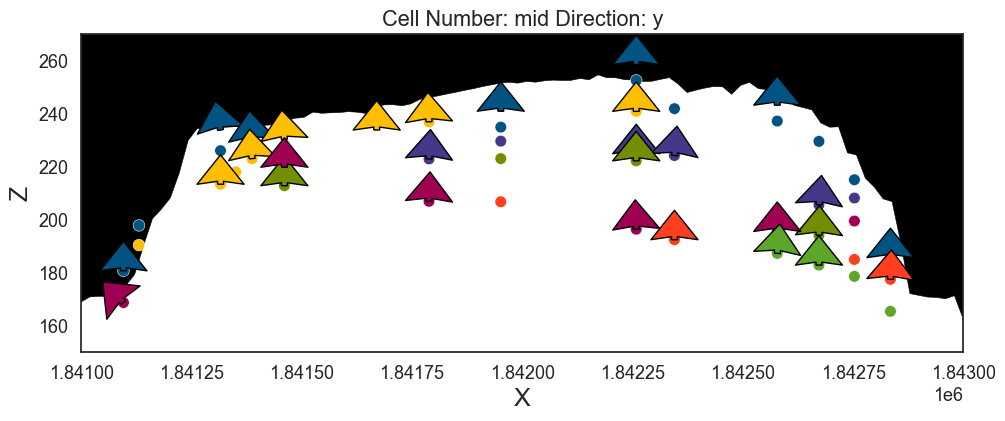

In [10]:
%%time
gp.plot_2d(geo_data,direction='y',show_topography=True, ve=6, show_data=True, legend=False)

In [11]:
%%time
#50s
gp.compute_model(geo_data, output='geology')

c:\users\cpothier\downloads\gempy-main\gempy-main\gempy\core\solution.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.geological_map = np.array(
c:\users\cpothier\downloads\gempy-main\gempy-main\gempy\core\solution.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.sections = np.array(


ValueError: Must have equal len keys and value when setting with an iterable

Visualisation du modèle 2D

CPU times: total: 188 ms
Wall time: 226 ms


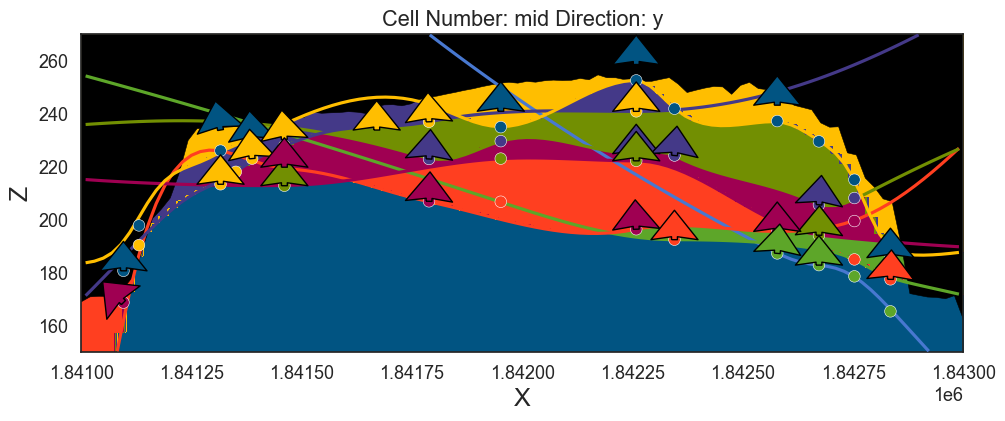

In [12]:
%%time
gp.plot_2d(geo_data,direction='y',show_topography=True, ve=6, show_data=True, legend=False)

CPU times: total: 203 ms
Wall time: 203 ms


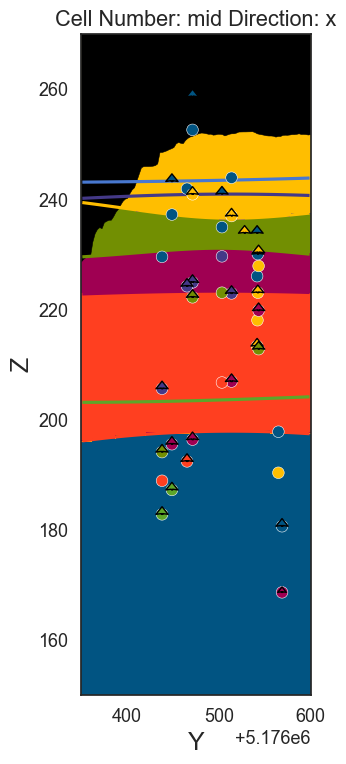

In [13]:
%%time
gp.plot_2d(geo_data,direction='x',show_topography=True, ve=6, show_data=True, legend=False)

Affichage de la carte de surface

CPU times: total: 125 ms
Wall time: 114 ms


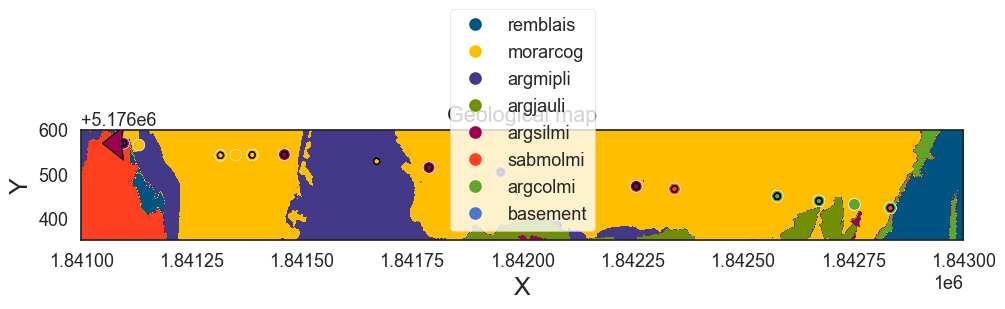

In [14]:
%%time
gp.plot_2d(geo_data, section_names= ['topography'], show_boundaries=False)

Affichage de la coupe

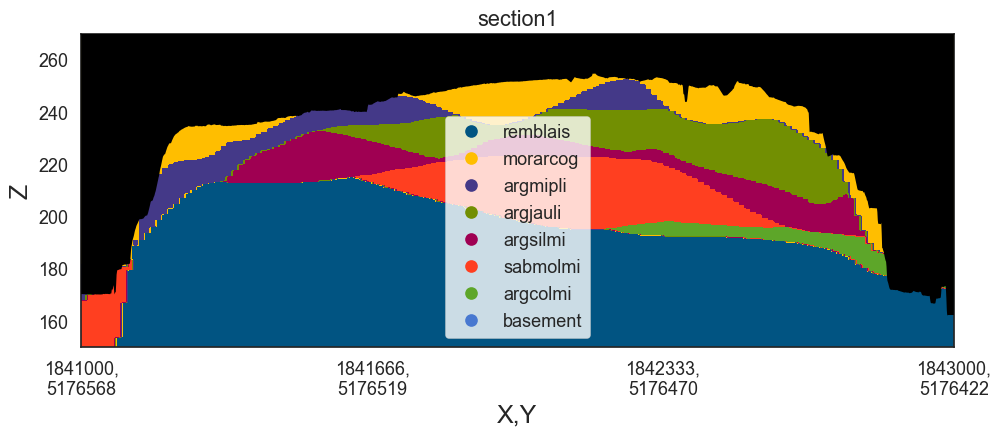

CPU times: total: 609 ms
Wall time: 619 ms


In [15]:
%%time
gp.plot_2d(geo_data, section_names=['section1'],ve=6,show_boundaries=False, show_topography=True)
plt.show()

Visualisation du modèle 3D

In [16]:
%%time
gp.plot_3d(geo_data, ve=6)

CPU times: total: 3.36 s
Wall time: 2min 38s
